Found 118 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


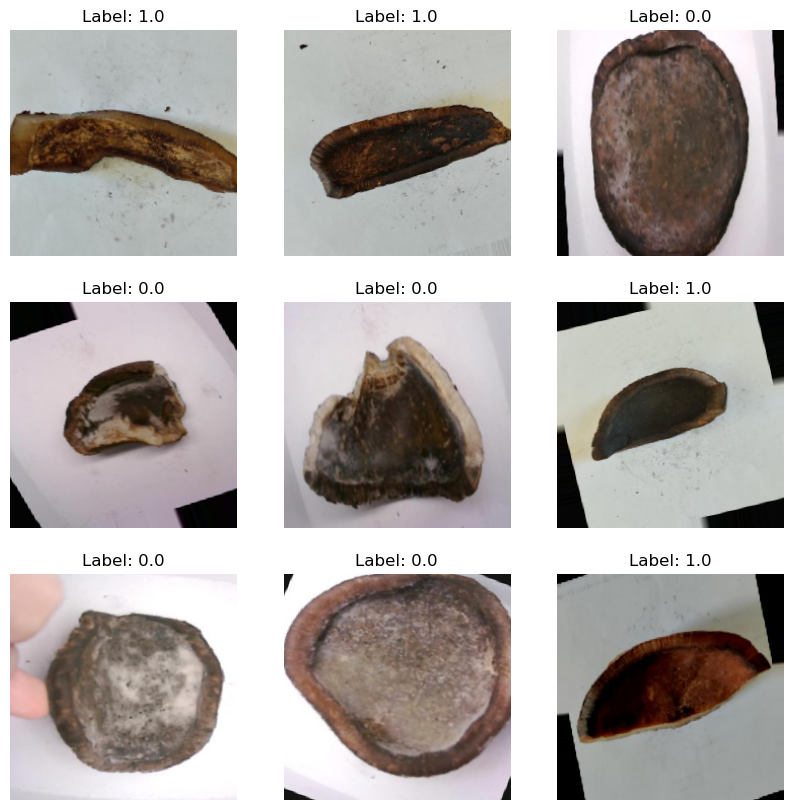

In [25]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paths
dataset_path = r"E:\Research\dev\New_Dataset\copra_mold_data"

# Data generators
data_gen = ImageDataGenerator(
    rescale=1.0/255, 
    validation_split=0.2,  # 80% training, 20% testing
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

# Train and test datasets
train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

test_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Visualize sample images
import matplotlib.pyplot as plt

# Get a batch of images and labels from the iterator
images, labels = next(train_data)  # Retrieves one batch from train_data

# Plot images in a 3x3 grid
plt.figure(figsize=(10, 10))
for i in range(9):  # Display the first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])  # Display the image
    plt.axis('off')
    plt.title(f"Label: {labels[i]}")  # Show label
plt.show()


In [27]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load MobileNetV2 with pre-trained weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

# Save the model
model.save("copra_mold_detection_model.h5")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4532 - loss: 0.8915 - val_accuracy: 0.4828 - val_loss: 0.7496
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 866ms/step - accuracy: 0.6188 - loss: 0.6724 - val_accuracy: 0.5862 - val_loss: 0.6199
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 944ms/step - accuracy: 0.7006 - loss: 0.6363 - val_accuracy: 0.6207 - val_loss: 0.5825
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 861ms/step - accuracy: 0.7606 - loss: 0.5102 - val_accuracy: 0.7931 - val_loss: 0.5477
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 849ms/step - accuracy: 0.8418 - loss: 0.4081 - val_accuracy: 0.7241 - val_loss: 0.4457
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 858ms/step - accuracy: 0.8650 - loss: 0.3625 - val_accuracy: 0.7931 - val_loss: 0.4420
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 870ms/step - accuracy: 0.7968 - loss: 0.4049 - val_accuracy: 0.7931 - val_loss: 0.3959
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 864ms/step - accuracy: 0.8952 - loss: 0.2913 - val_accuracy: 0.9310 - val_loss: 0

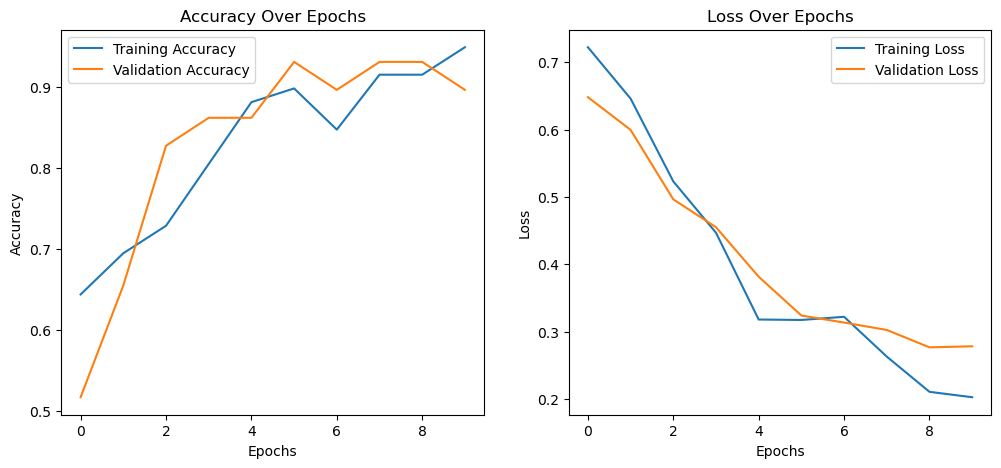

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - accuracy: 0.9310 - loss: 0.2943
Test Accuracy: 0.93


In [22]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")


In [15]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("copra_mold_detection_model.h5")

# Path to a new image
image_path = r"E:\Research\dev\New_Dataset\copra_mold_data\test2.jpeg"

# Preprocess the image
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image) / 255.0  # Normalize
image_array = np.expand_dims(image_array, axis=0)

# Predict
prediction = model.predict(image_array)
print(f"Prediction: {'Mold' if prediction[0][0] > 0.5 else 'No Mold'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Prediction: No Mold
